In [1]:
import pandas as pd
import re

In [55]:
def preprocess_csv(input_file, output_file):
    # Load data
    df = pd.read_csv(input_file)
    
    # Drop rows where either column is NaN or empty
    df.dropna(inplace=True)
    df = df[(df.iloc[:, 0] != '') & (df.iloc[:, 1] != '')]
    
    # Define a helper function to preprocess text
    def preprocess_text(text):
        # Remove "pause(x.xx)"
        text = re.sub(r'\(pause \d+\.\d+\)', '', text)

        # Reduce multiple consecutive commas, including spaces between them
        text = re.sub(r',\s*,+', ',', text)

        # Reduce other redundant punctuation (specifically periods, question marks, exclamations)
        text = re.sub(r'([.!?])\1+', r'\1', text)

        # Normalize spaces (remove multiple spaces, leading, and trailing spaces)
        text = re.sub(r'\s+', ' ', text).strip()

        # Ensure space after punctuation if it's immediately followed by a letter or number
        text = re.sub(r'(?<=[.,!?])(?=[^\s])', r' ', text)

        # Simple whitespace tokenizer
        tokens = text.split()

        # Join tokens back to string
        return ' '.join(tokens)
    
    # Apply preprocessing to each column
    for column in df.columns:
        df[column] = df[column].apply(preprocess_text)
    
    # Save the cleaned data to a new CSV file
    df.to_csv(output_file, index=False)

preprocess_csv('ai_corpus.csv', 'ai_cleaned_output.csv')


In [57]:
df = pd.read_csv("ai_corpus.csv")
df

,AAVE,SAE
0,And where were you born?,And where were you born?
1,"I was born in Fort Lauderdale, Florida.","I was born in Fort Lauderdale, Florida."
2,And when did you move here?,When did you relocate to this area?
3,I moved here (pause 0.62) two years after bein...,I moved here two years after I was born.
4,So when you were two?,"So, when you were two years old?"
...,...,...
31125,Huh?,What did you say?
31126,What do you have?,What do you possess or own?
31127,A dog.,A dog.
31128,What's the dog name?,What is the dog's name?


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31130 entries, 0 to 31129
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AAVE    31130 non-null  object
 1   SAE     30878 non-null  object
dtypes: object(2)
memory usage: 486.5+ KB


In [59]:
df2 = pd.read_csv("ai_cleaned_output.csv")
df2

,AAVE,SAE
0,And where were you born?,And where were you born?
1,"I was born in Fort Lauderdale, Florida.","I was born in Fort Lauderdale, Florida."
2,And when did you move here?,When did you relocate to this area?
3,I moved here two years after being born.,I moved here two years after I was born.
4,So when you were two?,"So, when you were two years old?"
...,...,...
30873,Huh?,What did you say?
30874,What do you have?,What do you possess or own?
30875,A dog.,A dog.
30876,What's the dog name?,What is the dog's name?


In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30878 entries, 0 to 30877
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AAVE    30878 non-null  object
 1   SAE     30878 non-null  object
dtypes: object(2)
memory usage: 482.6+ KB


In [61]:
df2.tail()

,AAVE,SAE
30873,Huh?,What did you say?
30874,What do you have?,What do you possess or own?
30875,A dog.,A dog.
30876,What's the dog name?,What is the dog's name?
30877,"Um, , Buster.","Um, Buster."


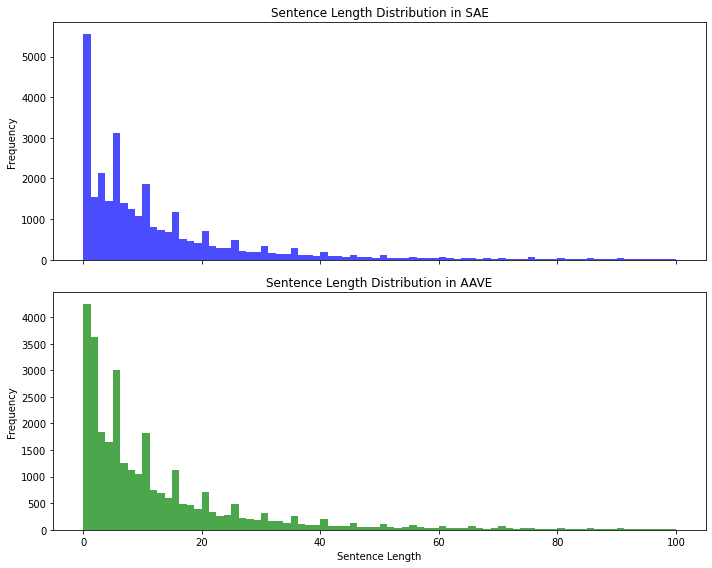

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sentence_length_distribution(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Assume the columns are named 'SAE' and 'AAVE'
    # Calculate sentence lengths for each language
    df['SAE_length'] = df['SAE'].str.split().apply(len)
    df['AAVE_length'] = df['AAVE'].str.split().apply(len)
    
    # Determine the range for the x-axis
    max_length = max(df['SAE_length'].max(), df['AAVE_length'].max())
    x_limit = max(10, 100)  # Adjust 50 to the max value you wish to display

    # Plotting
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Plot for SAE
    ax[0].hist(df['SAE_length'], bins=80, color='blue', alpha=0.7, range=(0, x_limit))
    ax[0].set_title('Sentence Length Distribution in SAE')
    ax[0].set_ylabel('Frequency')

    # Plot for AAVE
    ax[1].hist(df['AAVE_length'], bins=80, color='green', alpha=0.7, range=(0, x_limit))
    ax[1].set_title('Sentence Length Distribution in AAVE')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel('Sentence Length')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
file_path = 'ai_cleaned_output.csv'
plot_sentence_length_distribution(file_path)


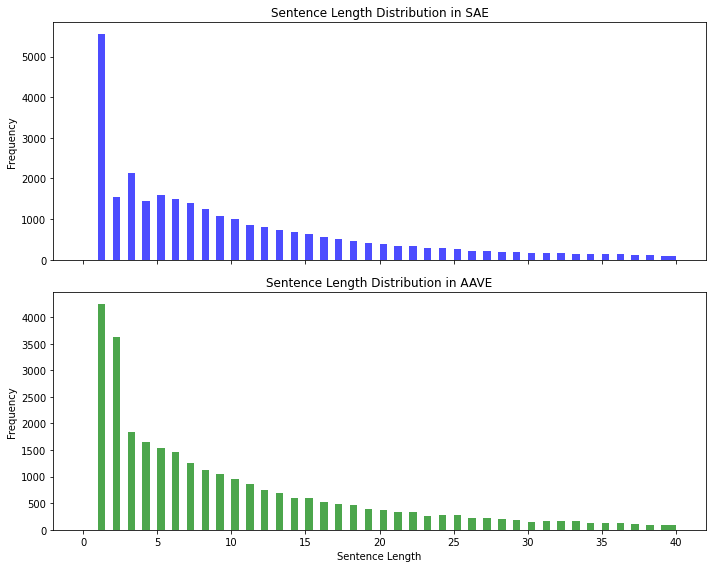

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sentence_length_distribution(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Assume the columns are named 'SAE' and 'AAVE'
    # Calculate sentence lengths for each language
    df['SAE_length'] = df['SAE'].str.split().apply(len)
    df['AAVE_length'] = df['AAVE'].str.split().apply(len)
    
    # Determine the range for the x-axis
    max_length = max(df['SAE_length'].max(), df['AAVE_length'].max())
    x_limit = max(10, 40)  # Adjust 50 to the max value you wish to display

    # Plotting
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Plot for SAE
    ax[0].hist(df['SAE_length'], bins=80, color='blue', alpha=0.7, range=(0, x_limit))
    ax[0].set_title('Sentence Length Distribution in SAE')
    ax[0].set_ylabel('Frequency')

    # Plot for AAVE
    ax[1].hist(df['AAVE_length'], bins=80, color='green', alpha=0.7, range=(0, x_limit))
    ax[1].set_title('Sentence Length Distribution in AAVE')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel('Sentence Length')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
file_path = 'ai_cleaned_output.csv'
plot_sentence_length_distribution(file_path)


In [2]:
import pandas as pd

def calculate_word_count_ratios(input_file):
    # Load data
    df = pd.read_csv(input_file)
    
    # Calculate word counts for each column
    df['SAE_word_count'] = df['SAE'].str.split().apply(len)
    df['AAVE_word_count'] = df['AAVE'].str.split().apply(len)
    
    # Calculate ratio of word counts (SAE to AAVE)
    # Ensure to avoid division by zero by adding a small epsilon to the denominator
    df['Word_Count_Ratio'] = df['SAE_word_count'] / (df['AAVE_word_count'] + 1e-9)
    
    # Sort by the ratio in descending order while preserving the original index
    df_sorted = df.sort_values(by='Word_Count_Ratio', ascending=False)
    
    return df_sorted

# Example usage
input_file = 'ai_cleaned_output.csv'
result_df = calculate_word_count_ratios(input_file)

# # Optionally, print or save the result to a new CSV
# print(result_df.head())  # Print the first few rows to inspect them
# result_df.to_csv('sorted_word_count_ratios.csv', index=True)  # Save with original index


In [116]:
result_df[1000:]

,AAVE,SAE,SAE_word_count,AAVE_word_count,Word_Count_Ratio
6663,Mm-hm.,"Yes, I understand.",3,1,3.000000
29444,Mm-hm.,"Yes, I understand.",3,1,3.000000
29840,Mm-hm.,"Yes, I understand.",3,1,3.000000
2060,Mm-hm.,"Yes, I understand.",3,1,3.000000
22272,Mm-hm.,"Yes, I understand.",3,1,3.000000
...,...,...,...,...,...
21035,[Okay. ] [Oh yeah. ] No that I was just terrib...,"Okay. Oh yeah. Now, I was just terrible at it....",113,892,0.126682
20734,"[and I thought I was] grown. Um, I started han...","I thought I was grown. Um, I started hanging o...",120,982,0.122200
4285,Rayful Edmonds was like a drug kingpin in Wash...,Rayful Edmonds was a prominent figure in the d...,120,988,0.121457
9827,"That was the first child, the next one come, ,...",train station is?,3,26,0.115385


In [6]:
import pandas as pd

def clean_based_on_ratio(input_file, output_file, min_ratio=0.75, max_ratio=1.25):
    # Load data
    df = pd.read_csv(input_file)
    
    # Calculate word counts for each column
    df['SAE_word_count'] = df['SAE'].str.split().apply(len)
    df['AAVE_word_count'] = df['AAVE'].str.split().apply(len)
    
    # Calculate ratio of word counts (SAE to AAVE)
    df['Word_Count_Ratio'] = df['SAE_word_count'] / (df['AAVE_word_count'] + 1e-9)
    
    # Filter DataFrame based on the ratio
    filtered_df = df[(df['Word_Count_Ratio'] >= min_ratio) & (df['Word_Count_Ratio'] <= max_ratio)]
    
    # Sort by the ratio in descending order while preserving the original index
    filtered_df_sorted = filtered_df.sort_values(by='Word_Count_Ratio', ascending=False)
    
    # Save the cleaned data to a new CSV file
    filtered_df_sorted.to_csv(output_file, index=True)
    
    return filtered_df_sorted

# Example usage
input_file = 'ai_cleaned_output.csv'
output_file = 'ai_filtered_output.csv'
cleaned_df = clean_based_on_ratio(input_file, output_file)

# Print the cleaned DataFrame
print(cleaned_df.head())


                                                    AAVE  \
24268  [Junior] High. Which is /RD-SCHOOL-3/ middle s...   
12938  /RD-WORK-3/, it was- it was alright, but I had...   
23600  Shit, I wo- I- nah, I wouldn't have-, I woulda...   
6757   Uh, wanna be a actor. , <laugh>, You know, , c...   
7277   Are there some things you can do, to get a wis...   

                                                     SAE  SAE_word_count  \
24268  Junior High. Which is RD-SCHOOL-3 middle schoo...              80   
12938  I worked at a place called RD-WORK-3. It was o...              40   
23600  Man, I was in a bad situation. I wouldn't have...              35   
6757   I want to be an actor. I find it funny. You kn...              35   
7277   Are there any specific actions you can take to...              30   

       AAVE_word_count  Word_Count_Ratio  
24268               64              1.25  
12938               32              1.25  
23600               28              1.25  
6757      

In [9]:
output_file = pd.read_csv('ai_filtered_output.csv')
output_file

,Unnamed: 0,AAVE,SAE,SAE_word_count,AAVE_word_count,Word_Count_Ratio
0,24268,[Junior] High. Which is /RD-SCHOOL-3/ middle s...,Junior High. Which is RD-SCHOOL-3 middle schoo...,80,64,1.250000
1,12938,"/RD-WORK-3/, it was- it was alright, but I had...",I worked at a place called RD-WORK-3. It was o...,40,32,1.250000
2,23600,"Shit, I wo- I- nah, I wouldn't have-, I woulda...","Man, I was in a bad situation. I wouldn't have...",35,28,1.250000
3,6757,"Uh, wanna be a actor. , <laugh>, You know, , c...",I want to be an actor. I find it funny. You kn...,35,28,1.250000
4,7277,"Are there some things you can do, to get a wis...",Are there any specific actions you can take to...,30,24,1.250000
...,...,...,...,...,...,...
20805,9990,"To the movies and-, but when- the o- the big g...","I go to the movies, but when the older girls g...",55,73,0.753425
20806,28539,"but, um, I glad we did cause like the neighbor...",I'm glad we moved because the neighborhood we ...,64,85,0.752941
20807,30259,"It wasn't nobody home, , and I heard something...",There was nobody at home. I heard something cr...,73,97,0.752577
20808,24316,Always. From ninth grade being so awkward and ...,Always. From ninth grade being so awkward and ...,82,109,0.752294


In [98]:
def preprocess_csv(input_file, output_file):
    # Load data
    df = pd.read_csv(input_file)
    
    # Drop rows where either column is NaN or empty
    #df.dropna(inplace=True)
    #df = df[(df.iloc[:, 0] != '') & (df.iloc[:, 1] != '')]
    
    # Define a helper function to preprocess text
    def preprocess_text(text):
        # Remove "pause(x.xx)"
        text = re.sub(r'\(pause \d+\.\d+\)', '', text)

        # Reduce multiple consecutive commas, including spaces between them
        text = re.sub(r',\s*,+', ',', text)

        # Reduce other redundant punctuation (specifically periods, question marks, exclamations)
        text = re.sub(r'([.!?])\1+', r'\1', text)

        # Normalize spaces (remove multiple spaces, leading, and trailing spaces)
        text = re.sub(r'\s+', ' ', text).strip()

        # Ensure space after punctuation if it's immediately followed by a letter or number
        text = re.sub(r'(?<=[.,!?])(?=[^\s])', r' ', text)

        # Simple whitespace tokenizer
        tokens = text.split()

        # Join tokens back to string
        return ' '.join(tokens)
    
    # Apply preprocessing to each column
    for column in df.columns:
        df[column] = df[column].apply(preprocess_text)
        
#     Drop rows where either column is NaN or empty
    df.dropna(inplace=True)
    df = df[(df.iloc[:, 0] != '') & (df.iloc[:, 1] != '')]
    
    # Save the cleaned data to a new CSV file
    df.to_csv(output_file, index=False)

preprocess_csv('pro_corpus.csv', 'pro_cleaned_output.csv')


In [99]:
df3 = pd.read_csv('pro_cleaned_output.csv')

In [100]:
df3

,Content,Translation
0,"not live, live. no that's about it.","not live, live. no that is it."
1,and where'd you go to school?,and where did you go to school?
2,where'd you go to college?,where did you go to college?
3,"uh, he was in the military. and he now works a...",he was in the military. and he now works as a ...
4,so i'm gonna stop typing now.,so i'm going to stop typing now.
...,...,...
5777,"at least like, the people i went to high schoo...","at least li, e, the people i went to high scho..."
5778,yeah.,yes
5779,"you know, definitely noti- like we were saying...","you know, definitely like were saying earlier ..."
5780,"listening, like, sitting down and like having ...","listening, like, sitting down and like having ..."


In [101]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Content      5782 non-null   object
 1   Translation  5782 non-null   object
dtypes: object(2)
memory usage: 90.5+ KB


In [102]:
df4 = pd.read_csv("pro_corpus.csv")

In [96]:
df4

,Content,Translation
0,"not live, live. no that's about it.","not live, live. no that is it."
1,and where'd you go to school?,and where did you go to school?
2,where'd you go to college?,where did you go to college?
3,"uh, he was in the military. and he now works a...",he was in the military. and he now works as a ...
4,so i'm gonna stop typing now.,so i'm going to stop typing now.
...,...,...
5783,"at least like, the people i went to high schoo...","at least li,e, the people i went to high schoo..."
5784,yeah.,yes
5785,"you know, definitely noti- like we were saying...","you know, definitely like were saying earlier ..."
5786,"listening, like, sitting down and like having ...","listening, like, sitting down and like having ..."


In [97]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5788 entries, 0 to 5787
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Content      5788 non-null   object
 1   Translation  5788 non-null   object
dtypes: object(2)
memory usage: 90.6+ KB


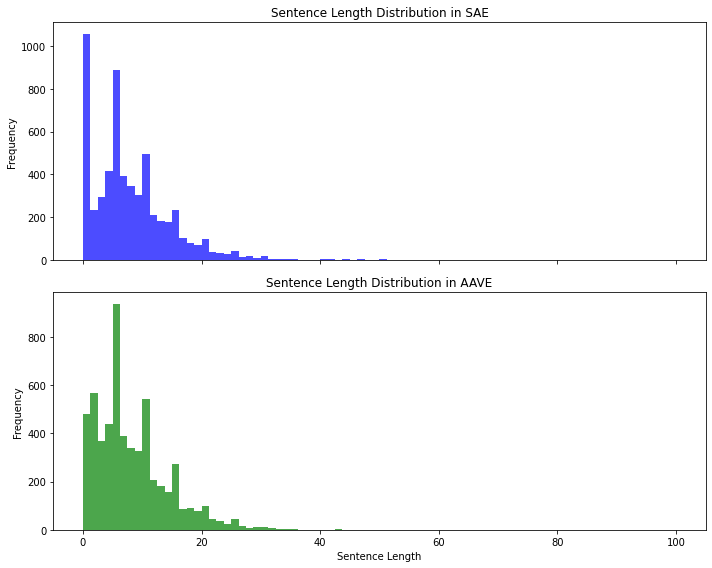

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sentence_length_distribution(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Assume the columns are named 'SAE' and 'AAVE'
    # Calculate sentence lengths for each language
    df['SAE_length'] = df['Translation'].str.split().apply(len)
    df['AAVE_length'] = df['Content'].str.split().apply(len)
    
    # Determine the range for the x-axis
    max_length = max(df['SAE_length'].max(), df['AAVE_length'].max())
    x_limit = max(10, 100)  # Adjust 50 to the max value you wish to display

    # Plotting
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Plot for SAE
    ax[0].hist(df['SAE_length'], bins=80, color='blue', alpha=0.7, range=(0, x_limit))
    ax[0].set_title('Sentence Length Distribution in SAE')
    ax[0].set_ylabel('Frequency')

    # Plot for AAVE
    ax[1].hist(df['AAVE_length'], bins=80, color='green', alpha=0.7, range=(0, x_limit))
    ax[1].set_title('Sentence Length Distribution in AAVE')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel('Sentence Length')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
file_path = 'pro_cleaned_output.csv'
plot_sentence_length_distribution(file_path)


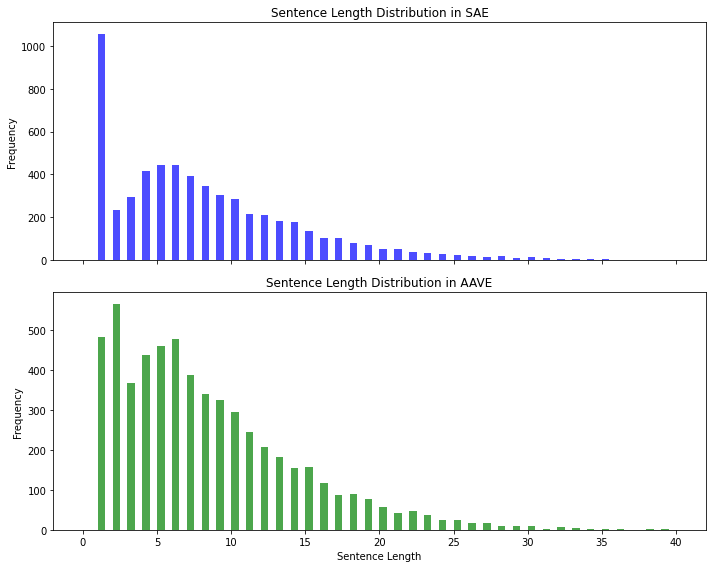

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sentence_length_distribution(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Assume the columns are named 'SAE' and 'AAVE'
    # Calculate sentence lengths for each language
    df['SAE_length'] = df['Translation'].str.split().apply(len)
    df['AAVE_length'] = df['Content'].str.split().apply(len)
    
    # Determine the range for the x-axis
    max_length = max(df['SAE_length'].max(), df['AAVE_length'].max())
    x_limit = max(10, 40)  # Adjust 50 to the max value you wish to display

    # Plotting
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Plot for SAE
    ax[0].hist(df['SAE_length'], bins=80, color='blue', alpha=0.7, range=(0, x_limit))
    ax[0].set_title('Sentence Length Distribution in SAE')
    ax[0].set_ylabel('Frequency')

    # Plot for AAVE
    ax[1].hist(df['AAVE_length'], bins=80, color='green', alpha=0.7, range=(0, x_limit))
    ax[1].set_title('Sentence Length Distribution in AAVE')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel('Sentence Length')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
file_path = 'pro_cleaned_output.csv'
plot_sentence_length_distribution(file_path)


In [4]:
import pandas as pd

def calculate_word_count_ratios(input_file):
    # Load data
    df = pd.read_csv(input_file)
    
    # Calculate word counts for each column
    df['SAE_word_count'] = df['Translation'].str.split().apply(len)
    df['AAVE_word_count'] = df['Content'].str.split().apply(len)
    
    # Calculate ratio of word counts (SAE to AAVE)
    # Ensure to avoid division by zero by adding a small epsilon to the denominator
    df['Word_Count_Ratio'] = df['SAE_word_count'] / (df['AAVE_word_count'] + 1e-9)
    
    # Sort by the ratio in descending order while preserving the original index
    df_sorted = df.sort_values(by='Word_Count_Ratio', ascending=False)
    
    return df_sorted


input_file = 'pro_cleaned_output.csv'
result_df = calculate_word_count_ratios(input_file)

In [5]:
result_df

,Content,Translation,SAE_word_count,AAVE_word_count,Word_Count_Ratio
2668,yeah.,it was us when the city would not do it.,10,1,10.000000
2306,president.,the president of the united states and all thi...,10,1,10.000000
4340,mm-hm.,yep. what kind of games do you play?,8,1,8.000000
2012,showing,the male role models in the program show,8,1,8.000000
2542,new.,it's no longer their neighborhood (new).,6,1,6.000000
...,...,...,...,...,...
411,"<ts> it's just tough. like, [even] when some w...",x,1,18,0.055556
529,"/rd-school-2/ this, /rd-school-2/ that, /rd-sc...",x,1,18,0.055556
273,"[mm-hm. the- my um], graduate class, majority ...",x,1,19,0.052632
477,like if i don't get a certain scholarship gran...,x,1,19,0.052632


In [10]:
import pandas as pd

def clean_based_on_ratio(input_file, output_file, min_ratio=0.75, max_ratio=1.25):
    # Load data
    df = pd.read_csv(input_file)
    
    # Calculate word counts for each column
    df['SAE_word_count'] = df['Translation'].str.split().apply(len)
    df['AAVE_word_count'] = df['Content'].str.split().apply(len)
    
    # Calculate ratio of word counts (SAE to AAVE)
    df['Word_Count_Ratio'] = df['SAE_word_count'] / (df['AAVE_word_count'] + 1e-9)
    
    # Filter DataFrame based on the ratio
    filtered_df = df[(df['Word_Count_Ratio'] >= min_ratio) & (df['Word_Count_Ratio'] <= max_ratio)]
    
    # Sort by the ratio in descending order while preserving the original index
    filtered_df_sorted = filtered_df.sort_values(by='Word_Count_Ratio', ascending=False)
    
    # Save the cleaned data to a new CSV file
    filtered_df_sorted.to_csv(output_file, index=True)
    
    return filtered_df_sorted

# Example usage
input_file = 'pro_cleaned_output.csv'
output_file = 'pro_filtered_output.csv'
cleaned_df = clean_based_on_ratio(input_file, output_file)

# Print the cleaned DataFrame
print(cleaned_df.head())


                                                Content  \
3398  [i] have no idea, but i'm glad she did. /i fol...   
3860  yeah, she my friend, but i don't hang with her...   
4616  [somebody] gonna wanna me different. oh, i'm'a...   
1907  i said, if you get a bowl, you don't have to pay.   
2795  that's what that mean? you gonna make them shi...   

                                            Translation  SAE_word_count  \
3398  [i] have no idea, but i am glad she did. /i fo...              20   
3860  yeah. she is my friend but i do not hang out w...              15   
4616  somebody that wants to be different, oh, i'm g...              15   
1907  i told her, if you get a bowl, you do not have...              15   
2795  is that what that means? are you going to make...              15   

      AAVE_word_count  Word_Count_Ratio  
3398               16              1.25  
3860               12              1.25  
4616               12              1.25  
1907               12     

In [11]:
output_file = pd.read_csv('pro_filtered_output.csv')
output_file

,Unnamed: 0,Content,Translation,SAE_word_count,AAVE_word_count,Word_Count_Ratio
0,3398,"[i] have no idea, but i'm glad she did. /i fol...","[i] have no idea, but i am glad she did. /i fo...",20,16,1.250000
1,3860,"yeah, she my friend, but i don't hang with her...",yeah. she is my friend but i do not hang out w...,15,12,1.250000
2,4616,"[somebody] gonna wanna me different. oh, i'm'a...","somebody that wants to be different, oh, i'm g...",15,12,1.250000
3,1907,"i said, if you get a bowl, you don't have to pay.","i told her, if you get a bowl, you do not have...",15,12,1.250000
4,2795,that's what that mean? you gonna make them shi...,is that what that means? are you going to make...,15,12,1.250000
...,...,...,...,...,...,...
4106,5002,"/at um, / the last person that i said a word o...","the last person that i said a word on, that on...",13,17,0.764706
4107,3013,"we heard the gunshots, and then i figured we- ...","we heard the gunshots, and then i figured we-w...",16,21,0.761905
4108,673,we used to grow like cabbages and stuff in the...,we used to grow cabbages and things in the bac...,16,21,0.761905
4109,4353,a girl be standing way far from away from me. ...,a girl stands far away from me and two people-...,16,21,0.761905


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

def save_datasets(train, valid, test, prefix):
    train[['SAE', 'AAVE']].to_csv(f'{prefix}_train.csv', index=False)
    valid[['SAE', 'AAVE']].to_csv(f'{prefix}_valid.csv', index=False)
    test[['SAE', 'AAVE']].to_csv(f'{prefix}_test.csv', index=False)
    # Save specific columns for SAE and AAVE as plain text files
    train['SAE'].to_csv(f'{prefix}_train.sae', index=False, header=False)
    train['AAVE'].to_csv(f'{prefix}_train.aave', index=False, header=False)
    valid['SAE'].to_csv(f'{prefix}_valid.sae', index=False, header=False)
    valid['AAVE'].to_csv(f'{prefix}_valid.aave', index=False, header=False)
    test['SAE'].to_csv(f'{prefix}_test.sae', index=False, header=False)
    test['AAVE'].to_csv(f'{prefix}_test.aave', index=False, header=False)

def check_columns_exist(df, columns):
    missing_columns = [col for col in columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Missing columns: {', '.join(missing_columns)} in DataFrame")

def create_datasets():
    ai_corpus = pd.read_csv('ai_filtered_output.csv')
    pro_corpus = pd.read_csv('pro_filtered_output.csv')

    # Check for necessary columns
    for corpus in [ai_corpus, pro_corpus]:
        check_columns_exist(corpus, ['SAE', 'AAVE'])

    # First Set
    train_1 = ai_corpus
    valid_1, test_1 = train_test_split(pro_corpus, test_size=0.5)
    save_datasets(train_1, valid_1, test_1, 'set1')

    # Second Set
    train_2 = pd.concat([pro_corpus, ai_corpus.sample(n=len(pro_corpus), random_state=1)])
    remaining_ai_2 = ai_corpus.drop(train_2.index)
    valid_2, test_2 = train_test_split(remaining_ai_2, train_size=2000, test_size=2000)
    save_datasets(train_2, valid_2, test_2, 'set2')

    # Third Set
    train_3_ai = ai_corpus.sample(n=18000, random_state=1)
    train_3_pro = pro_corpus.sample(n=3000, random_state=1)
    train_3 = pd.concat([train_3_ai, train_3_pro])
    
    remaining_ai_3 = ai_corpus.drop(train_3_ai.index)
    remaining_pro_3 = pro_corpus.drop(train_3_pro.index)

    valid_3 = remaining_ai_3
    test_3 = remaining_pro_3
    save_datasets(train_3, valid_3, test_3, 'set3')

# Run the function to create and save datasets
create_datasets()
